# Verifying Flu Forecasts 2021-01-10

The data at the beginning of January shows a steep downward trend that negatively effects the forecasts. We don't know where this comes from, but suspect reporting delays due to holidays.

In [ ]:
import covidcast
from datetime import date
import matplotlib.pyplot as plt
from delphi_utils import GeoMapper
import pandas as pd

df_prop = covidcast.signal(
    data_source = 'hhs', 
    signal = 'confirmed_admissions_influenza_1d_prop_7dav',
    start_day=date(2021, 9, 1),
    end_day=date(2022, 1, 10),
    geo_type='state'
)
df_pop = GeoMapper().get_crosswalk("state_id", "pop")

df_prop_pop = pd.merge(df_prop, df_pop, left_on="geo_value", right_on="state_id")
df_prop_pop["value"] = df_prop_pop["value"] * 7 * df_prop_pop["pop"] / 100000
df_prop_pop.set_index(["geo_value", "time_value"], inplace=True)

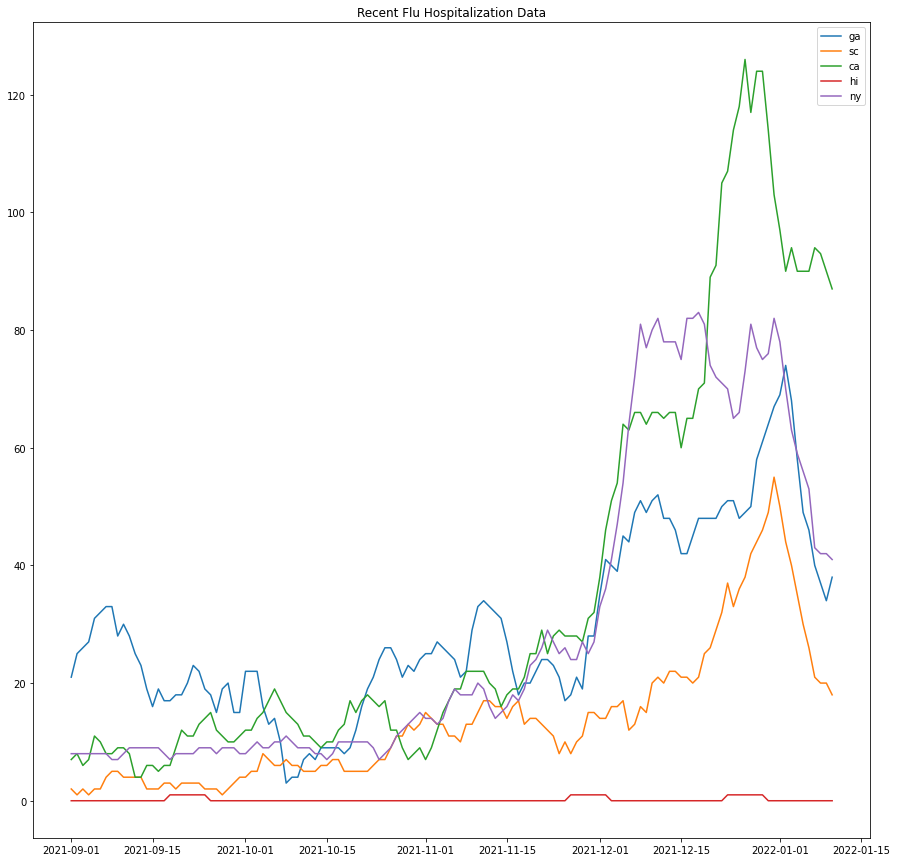

In [2]:
plt.figure(figsize=(15, 15))
plt.plot(df_prop_pop.loc["ga", :]["value"], label="ga")
plt.plot(df_prop_pop.loc["sc", :]["value"], label="sc")
plt.plot(df_prop_pop.loc["ca", :]["value"], label="ca")
plt.plot(df_prop_pop.loc["hi", :]["value"], label="hi")
plt.plot(df_prop_pop.loc["ny", :]["value"], label="ny")
plt.title("Recent Flu Hospitalization Data")
plt.legend()

In [3]:
df = covidcast.signal(
    data_source = 'hhs', 
    signal = 'confirmed_admissions_influenza_1d',
    start_day=date(2021, 9, 1),
    end_day=date(2022, 1, 10),
    geo_type='state'
)
df.set_index(["geo_value", "time_value"], inplace=True)
df.sort_index(inplace=True)
df.loc["ca", "2021-12-28":, :]

signal      issue  lag  \
geo_value time_value                                                      
ca        2021-12-28  confirmed_admissions_influenza_1d 2021-12-31    3   
          2021-12-29  confirmed_admissions_influenza_1d 2022-01-06    8   
          2021-12-30  confirmed_admissions_influenza_1d 2022-01-06    7   
          2021-12-31  confirmed_admissions_influenza_1d 2022-01-06    6   
          2022-01-01  confirmed_admissions_influenza_1d 2022-01-06    5   
          2022-01-02  confirmed_admissions_influenza_1d 2022-01-06    4   
          2022-01-03  confirmed_admissions_influenza_1d 2022-01-08    5   
          2022-01-04  confirmed_admissions_influenza_1d 2022-01-07    3   
          2022-01-05  confirmed_admissions_influenza_1d 2022-01-08    3   
          2022-01-06  confirmed_admissions_influenza_1d 2022-01-09    3   
          2022-01-07  confirmed_admissions_influenza_1d 2022-01-12    5   
          2022-01-08  confirmed_admissions_influenza_1d 2022-01-12    4   
          2022-01-09  confirmed_admissions_influenza_1d 2022-01-13    4   
          2022-01-10  confirmed_admissions_influenza_1d 2022-01-13    3   

                      missing_value  missing_stderr  missing_sample_size  \
geo_value time_value                                                       
ca        2021-12-28              0               5                    5   
          2021-12-29              0               5                    5   
          2021-12-30              0               5                    5   
          2021-12-31              0               5                    5   
          2022-01-01              0               5                    5   
          2022-01-02              0               5                    5   
          2022-01-03              0               5                    5   
          2022-01-04              0               5                    5   
          2022-01-05              0               5                    5   
          2022-01-06              0               5                    5   
          2022-01-07              0               5                    5   
          2022-01-08              0               5                    5   
          2022-01-09              0               5                    5   
          2022-01-10              0               5                    5   

                      value stderr sample_size geo_type data_source  
geo_value time_value                                                 
ca        2021-12-28   20.0   None        None    state         hhs  
          2021-12-29   18.0   None        None    state         hhs  
          2021-12-30    7.0   None        None    state         hhs  
          2021-12-31    8.0   None        None    state         hhs  
          2022-01-01    8.0   None        None    state         hhs  
          2022-01-02   14.0   None        None    state         hhs  
          2022-01-03   19.0   None        None    state         hhs  
          2022-01-04   16.0   None        None    state         hhs  
          2022-01-05   18.0   None        None    state         hhs  
          2022-01-06    7.0   None        None    state         hhs  
          2022-01-07   12.0   None        None    state         hhs  
          2022-01-08    7.0   None        None    state         hhs  
          2022-01-09   11.0   None        None    state         hhs  
          2022-01-10   16.0   None        None    state         hhs